C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\fft.py:116: UserWarning: nsgt.fft falling back to numpy.fft
  warn("nsgt.fft falling back to numpy.fft")
C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\pymssa\mssa.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Sample data for verification:
B_Y1: [ 0.   -2.68 -3.05 -3.03 -2.92]
B_Y2: [-12.47  -3.05  -2.97  -3.03  -2.95]
B_Y3: [-2.79  1.45 -2.08  6.05  1.37]
B_Y4: [ 0.16  1.32  0.45 -9.66  1.97]


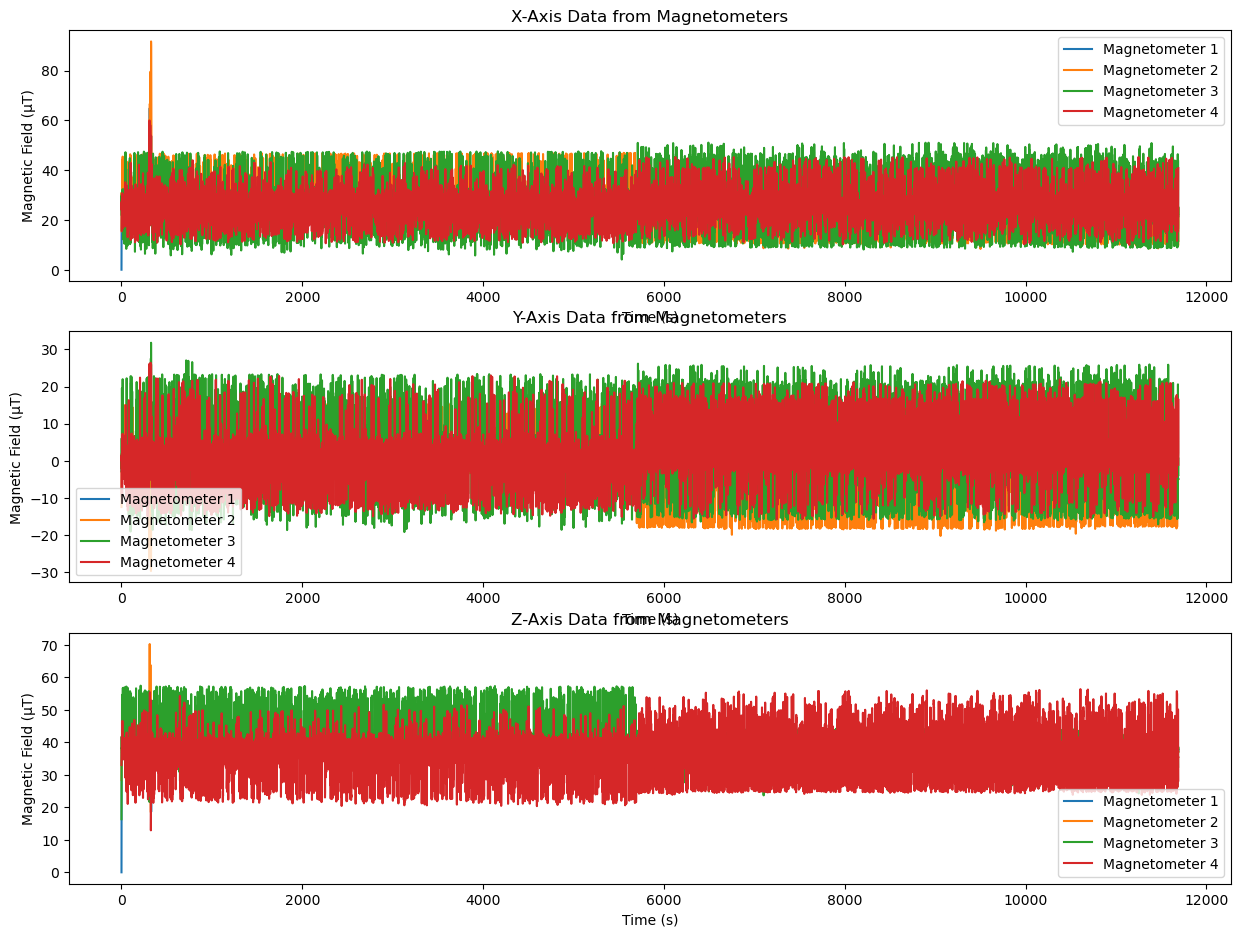

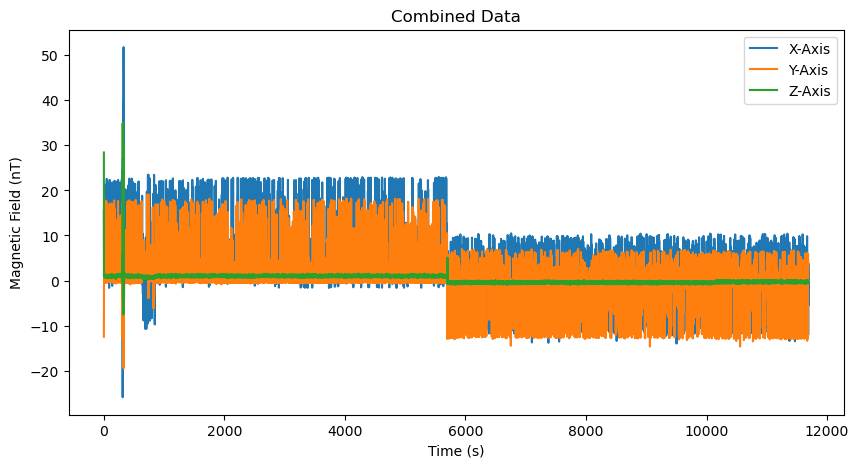

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r'C:\Users\ASUS\Desktop\ubss\MAGPRIME')
from magprime.algorithms import UBSS
from magprime.algorithms import NESS
from magprime.utility import calculate_coupling_coefficients

# Function to load data from the .dat file
def load_data(file_path):
    try:
        # Use np.genfromtxt to handle non-numeric entries
        data = np.genfromtxt(file_path, usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), 
                             invalid_raise=False, filling_values=0)
    except Exception as e:
        print(f"Error loading data: {e}")
        data = np.array([])  # Return an empty array in case of an error
    return data

# Path to the data file
file_path = r"C:\Users\ASUS\Desktop\ubss\FM_EPDM_BOARD_1.5HRS_DATA_1.7MS1.txt"

# Load data
B = load_data(file_path)
if B.size == 0:
    raise ValueError("Failed to load data or data is empty")

# Check for rows with all zeros (likely due to invalid entries)
if not B.any(axis=1).all():
    print("Warning: Some rows contain only zeros due to invalid entries.")

Ba = B.T  # Transpose to separate columns

# Separate into individual arrays for each magnetometer's X, Y, Z components
B_X1, B_Y1, B_Z1 = Ba[0], Ba[1], Ba[2]
B_X2, B_Y2, B_Z2 = Ba[3], Ba[4], Ba[5]
B_X3, B_Y3, B_Z3 = Ba[6], Ba[7], Ba[8]
B_X4, B_Y4, B_Z4 = Ba[9], Ba[10], Ba[11]

# Print sample data to verify values
print("Sample data for verification:")
print("B_Y1:", B_Y1[:5])
print("B_Y2:", B_Y2[:5])
print("B_Y3:", B_Y3[:5])
print("B_Y4:", B_Y4[:5])


# Stack the data into 2D arrays for each magnetometer (3 x n for each)
B1 = np.vstack((B_X1, B_Y1, B_Z1))
B2 = np.vstack((B_X2, B_Y2, B_Z2))
B3 = np.vstack((B_X3, B_Y3, B_Z3))
B4 = np.vstack((B_X4, B_Y4, B_Z4))

# Stack all magnetometer data into a 3D array: (magnetometers, axes, data points)
B_ma = np.stack((B1, B2, B3, B4), axis=0)


# Plot the data for each axis of the four magnetometers
plt.figure(figsize=(15, 15))

# Plot X-Axis Data from Magnetometers
plt.subplot(4, 1, 1)
plt.title("X-Axis Data from Magnetometers")
plt.plot(B_X1, label="Magnetometer 1")
plt.plot(B_X2, label="Magnetometer 2")
plt.plot(B_X3, label="Magnetometer 3")
plt.plot(B_X4, label="Magnetometer 4")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()

# Plot Y-Axis Data from Magnetometers
plt.subplot(4, 1, 2)
plt.title("Y-Axis Data from Magnetometers")
plt.plot(B_Y1, label="Magnetometer 1")
plt.plot(B_Y2, label="Magnetometer 2")
plt.plot(B_Y3, label="Magnetometer 3")
plt.plot(B_Y4, label="Magnetometer 4")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()

# Plot Z-Axis Data from Magnetometers
plt.subplot(4, 1, 3)
plt.title("Z-Axis Data from Magnetometers")
plt.plot(B_Z1, label="Magnetometer 1")
plt.plot(B_Z2, label="Magnetometer 2")
plt.plot(B_Z3, label="Magnetometer 3")
plt.plot(B_Z4, label="Magnetometer 4")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()


plt.figure(figsize=(10, 5))
plt.title("Combined Data")
plt.plot(B_ma[1,0]-B_ma[0,0], label="X-Axis")
plt.plot(B_ma[1,1]-B_ma[0,1], label="Y-Axis")
plt.plot(B_ma[1,2]-B_ma[0,2], label="Z-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (nT)")
plt.legend()
plt.show()